In [1]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_mean

imname = 'Slice_4_40X_Top_of_Brain.tif'
img = skimage.io.imread(imname)

nucl = img[:, :, 0]

thresh = threshold_mean(nucl)
binary = nucl > thresh


#removes small objects
from skimage.morphology import remove_small_objects

clim = remove_small_objects(binary, min_size=100)


#smooths the edges of the objects and fills in holes
from skimage.filters.rank import median
from skimage.morphology import disk
from scipy import ndimage as ndi

fill_cells = median(ndi.binary_fill_holes(clim), disk(2))


#watersheds the objects separating them into more objects
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(fill_cells)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((5,5)),
                            labels=fill_cells)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=fill_cells)

C:\Users\Emily\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


In [2]:
labels.max()

507

In [3]:
import numpy as np
import math as m

props = skimage.measure.regionprops(labels)

numobj = labels.max()

objects = np.zeros((numobj, 7)) #rows, columns

i = 0 
while i < numobj:
    objects[i,0] = (i + 1)
    objects[i,1] = props[i].centroid[0] #x-coordinate
    objects[i,2] = props[i].centroid[1] #y-coordinate
    objects[i,3] = props[i].area
    objects[i,4] = props[i].perimeter  
    objects[i,5] = ((props[i].perimeter)**2)/(4*m.pi*props[i].area)
    i = i + 1

In [4]:
objects

array([[  1.        ,   7.        , 146.41176471, ...,  19.07106781,
          0.85125807,   0.        ],
       [  2.        ,   9.09183673, 303.81122449, ...,  51.45584412,
          1.07498766,   0.        ],
       [  3.        ,  10.23636364, 435.52727273, ...,  27.10660172,
          1.06310851,   0.        ],
       ...,
       [505.        , 508.34375   , 293.40625   , ...,  19.65685425,
          0.96087787,   0.        ],
       [506.        , 508.20588235, 366.88235294, ...,  31.07106781,
          1.12977922,   0.        ],
       [507.        , 509.12765957, 123.61702128, ...,  27.07106781,
          1.24080362,   0.        ]])

In [5]:
x1 = int(objects[1,1]) - 50
if x1 < 0:
    x1 = 0
y1 = int(objects[1,2]) - 50
if y1 < 0:
    y1 = 0
x2 = int(objects[1,1]) + 50
y2 = int(objects[1,2]) + 50

cropped = labels[x1:x2,y1:y2]

In [8]:
height, width = cropped.shape

distinctNums(cropped, width, height)

8

In [9]:
def distinctNums(arr, width, height): 
    nums = []
    for i in range(0,width):
        for j in range(0,height):

            d = 0
            for k in range(0,len(nums)):
                if (arr[j,i] == nums[k]):
                    d = 1
                    break

            if (d == 0): 
                    nums.append(arr[j,i])
    return (len(nums))

In [31]:
h1 = int(height/8)

In [36]:
height, width = labels.shape

heatMap = np.zeros((height, width))

for y in range(0, int(height/16)):
    for x in range(0, int(width/16)):
        x1 = x*16
        y1 = y*16
        x2 = x*16 + 16
        y2 = y*16 + 16
        cropped = labels[x1:x2,y1:y2]
        for s in range(y1, y2):
            for t in range(x1, x2):
                heatMap[s,t] = distinctNums(cropped, 16, 16)
        

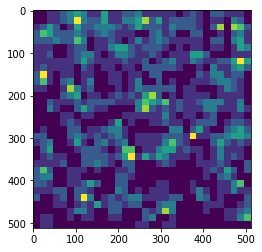

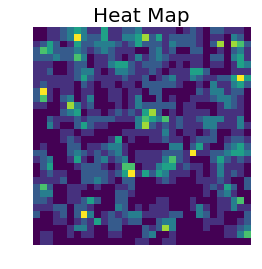

In [39]:
plt.imshow(heatMap)
plt.show()

fig = plt.figure(figsize =(4,4))
a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(heatMap)
a.set_title('Heat Map', fontsize = 20)
a.set_axis_off()
 
fig.savefig('Cell_Density_Heat_Map.png')

In [41]:
heatMap.max()

8.0

In [15]:
def objectsNearBy(objects):
    numObjects, descriptors = objects.shape
    for n in range(0,numObjects):
        x1 = int(objects[n,1]) - 50
        if x1 < 0:
            x1 = 0
        y1 = int(objects[n,2]) - 50
        if y1 < 0:
            y1 = 0
        x2 = int(objects[n,1]) + 50
        y2 = int(objects[n,2]) + 50

        cropped = labels[x1:x2,y1:y2]
        
        height, width = cropped.shape
        
        objects[n, 6] = distinctNums(cropped, width, height)
        
    return objects
        

In [16]:
extrarowobjects = objectsNearBy(objects)

In [17]:
extrarowobjects

array([[  1.        ,   7.        , 146.41176471, ...,  19.07106781,
          0.85125807,  14.        ],
       [  2.        ,   9.09183673, 303.81122449, ...,  51.45584412,
          1.07498766,   8.        ],
       [  3.        ,  10.23636364, 435.52727273, ...,  27.10660172,
          1.06310851,  11.        ],
       ...,
       [505.        , 508.34375   , 293.40625   , ...,  19.65685425,
          0.96087787,  15.        ],
       [506.        , 508.20588235, 366.88235294, ...,  31.07106781,
          1.12977922,  13.        ],
       [507.        , 509.12765957, 123.61702128, ...,  27.07106781,
          1.24080362,  20.        ]])

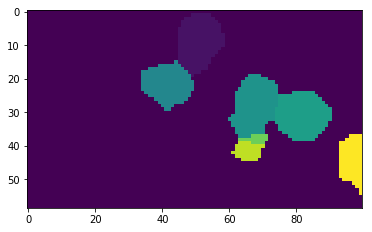

In [40]:
plt.imshow(cropped)
plt.show()

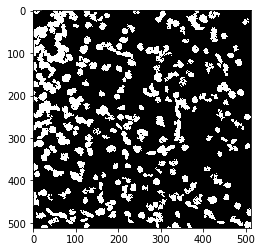

In [32]:
plt.imshow(clim, cmap='gray')
plt.show()

In [33]:
print(x1, x2, y1, y2)

0 59 253 353


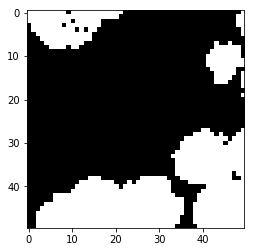

In [35]:
cropped = clim[0:50,0:50]
plt.imshow(cropped, cmap='gray')
plt.show()

In [ ]:
heat map - display the density of each "box " within the image 

Put in image, get out the cell count, denisty of image, average cell size
